## Análisis de datos Categóricos con Python de Clientes Bancarios

Este notebook aplica análisis y visualizaciones categóricas utilizando el dataset de cuentas de un banco colombiano. Exploraremos datos como la categoría de la cuenta, la ciudad de residencia, el monto en la cuenta, si los clientes tienen hijos y si están empleados o pensionados.

# Empezaremos cargando los datos:

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Código para cargar el dataset de uno de los bancos

import pandas as pd

# Cargar el dataset del banco
df = pd.read_csv('/content/dataset_banco_B 2.csv')

# Mostrar las primeras filas del dataset
df.head()




,Usuario,Categoría de cuenta,Ciudad,Monto en la cuenta,Tiene hijos,Estado laboral,Género,Banco
0,User_1,Clásica,Cali,2350035,No,Pensionado,Hombre,B
1,User_2,Clásica,Barranquilla,8720283,No,Pensionado,Mujer,B
2,User_3,Preferencial,Manizales,2103784,Sí,Empleado,Mujer,B
3,User_4,Preferencial,Barranquilla,2886849,Sí,Empleado,Hombre,B
4,User_5,Clásica,Barranquilla,5471798,No,Empleado,Hombre,B


<img alt="Datos categóricos con Python" title="Datos categóricos con Python" src="http://relopezbriega.github.io/images/categorical_data.jpg" high=400px width=600px>

## Introducción

Cuando trabajamos con [estadísticas](http://relopezbriega.github.io/tag/estadistica.html), es importante reconocer los diferentes tipos de [datos](https://es.wikipedia.org/wiki/Dato): numéricos ([discretos y continuos](https://es.wikipedia.org/wiki/Variable_discreta_y_variable_continua)), [categóricos](https://en.wikipedia.org/wiki/Categorical_variable) y ordinales. Los [datos](https://es.wikipedia.org/wiki/Dato) no son más que observaciones del mundo en que vivimos, por tanto, los mismos pueden venir en diferentes formas, no solo numérica. Por ejemplo, si le preguntáramos a nuestros amigos ¿cuántas mascotas tienen? nos podrían responder: `0, 1, 2, 4, 3, 8`; esta información por sí misma puede ser útil, pero para nuestro análisis de mascotas, nos podría servir también otro tipo de información, como por ejemplo el *género* de cada uno de nuestros amigos; de esta forma obtendríamos la siguiente información: `hombre, mujer, mujer, mujer, hombre, mujer`. Como vemos, podemos incluir a los [datos](https://es.wikipedia.org/wiki/Dato) dentro de tres categorías fundamentales: [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad) o numéricos, [datos cualitativos](https://es.wikipedia.org/wiki/Cualidad) o [categóricos](https://en.wikipedia.org/wiki/Categorical_variable) y datos ordinales.

### Datos cuantitativos

Los [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad) son representados por números; estos números van a ser significativos si representan la medida o la cantidad observada de cierta característica. Dentro de esta categoría podemos encontrar por ejemplo: cantidades de dólares, cuentas, tamaños, número de empleados, y kilómetros por hora. Con los [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad), se puede hacer todo tipo de tareas de procesamiento de datos numéricos, tales como sumarlos, calcular promedios, o medir su variabilidad. Asimismo, vamos a poder dividir a los [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad) en [discretos y continuos](https://es.wikipedia.org/wiki/Variable_discreta_y_variable_continua), dependiendo de los valores potencialmente observables.

* Los datos ***discretos*** solo van a poder asumir un valor de una lista de números específicos. Representan ítems que pueden ser *contados*; todos sus posibles valores pueden ser listados. Suele ser relativamente fácil trabajar con este tipo de [dato](https://es.wikipedia.org/wiki/Dato).

* Los datos ***continuos*** representan *mediciones*; sus posibles valores no pueden ser contados y sólo pueden ser descritos usando intervalos en la recta de los [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real). Por ejemplo, la cantidad de kilómetros recorridos no puede ser medida con exactitud, puede ser que hayamos recorrido 1.7 km o 1.6987 km; en cualquier medida que tomemos del mundo real, siempre pueden haber pequeñas o grandes variaciones. Generalmente, los *datos continuos* se suelen redondear a un número fijo de decimales para facilitar su manipulación.


### Datos cualitativos

Si los [datos](https://es.wikipedia.org/wiki/Dato) nos dicen en cual de determinadas categorías no numéricas nuestros ítems van a caer, entonces estamos hablando de [datos cualitativos](https://es.wikipedia.org/wiki/Cualidad) o [categóricos](https://en.wikipedia.org/wiki/Categorical_variable); ya que los mismos van a representar determinada *cualidad* que los ítems poseen. Dentro de esta categoría vamos a encontrar [datos](https://es.wikipedia.org/wiki/Dato) como: el sexo de una persona, el estado civil, la ciudad natal, o los tipos de películas que le gustan. Los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable) pueden tomar valores numéricos (por ejemplo, "1" para indicar "masculino" y "2" para indicar "femenino"), pero esos números no tienen un sentido matemático.

### Datos ordinales

Una categoría intermedia entre los dos tipos de [datos](https://es.wikipedia.org/wiki/Dato) anteriores, son los *datos ordinales*. En este tipo de [datos](https://es.wikipedia.org/wiki/Dato), va a existir un *orden* significativo, vamos a poder clasificar un primero, segundo, tercero, etc. es decir, que podemos establecer un *ranking* para estos [datos](https://es.wikipedia.org/wiki/Dato), el cual posiblemente luego tenga un rol importante en la etapa de análisis. Los [datos](https://es.wikipedia.org/wiki/Dato) se dividen en categorías, pero los números colocados en cada categoría tienen un significado. Por ejemplo, la calificación de un restaurante en una escala de 0 (bajo) a 5 (más alta) estrellas representa *datos ordinales*. Los *datos ordinales* son a menudo tratados como [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable), en el sentido que se suelen agrupar y ordenar. Sin embargo, a diferencia de los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable), los números sí tienen un significado matemático.

En este artículo me voy a centrar en el segundo grupo, los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable); veremos como podemos manipular fácilmente con la ayuda de [Python](http://python.org/) estos [datos](https://es.wikipedia.org/wiki/Dato) para poder encontrar *patrones*, *relaciones*, *tendencias* y *excepciones*.

In [2]:
# Listar todas las columnas del DataFrame
print(df.columns)

Index(['Usuario', 'Categoría de cuenta', 'Ciudad', 'Monto en la cuenta',
       'Tiene hijos', 'Estado laboral', 'Género', 'Banco'],
      dtype='object')


In [13]:
df.head(10)

,Usuario,Categoría de cuenta,Ciudad,Monto en la cuenta,Tiene hijos,Estado laboral,Género,Banco
0,User_1,Clásica,Cali,2350035,No,Pensionado,Hombre,B
1,User_2,Clásica,Barranquilla,8720283,No,Pensionado,Mujer,B
2,User_3,Preferencial,Manizales,2103784,Sí,Empleado,Mujer,B
3,User_4,Preferencial,Barranquilla,2886849,Sí,Empleado,Hombre,B
4,User_5,Clásica,Barranquilla,5471798,No,Empleado,Hombre,B
5,User_6,Preferencial,Cartagena,2022627,Sí,Pensionado,Mujer,B
6,User_7,Clásica,Barranquilla,6559905,No,Empleado,Mujer,B
7,User_8,Preferencial,Bogotá,8329975,Sí,Empleado,Mujer,B
8,User_9,Normal,Manizales,399329,Sí,Empleado,Hombre,B
9,User_10,Clásica,Barranquilla,4985582,No,Empleado,Hombre,B


In [6]:
# Exploración de los tipos de datos

# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Usuario              5000 non-null   object
 1   Categoría de cuenta  5000 non-null   object
 2   Ciudad               5000 non-null   object
 3   Monto en la cuenta   5000 non-null   int64 
 4   Tiene hijos          5000 non-null   object
 5   Estado laboral       5000 non-null   object
 6   Género               5000 non-null   object
 7   Banco                5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [8]:
# Estadísticas descriptivas básicas
df.describe(include='all')




,Usuario,Categoría de cuenta,Ciudad,Monto en la cuenta,Tiene hijos,Estado laboral,Género,Banco
count,5000,5000,5000,5.000000e+03,5000,5000,5000,5000
unique,5000,3,10,NaN,2,2,2,1
top,User_5000,Preferencial,Cartagena,NaN,No,Empleado,Hombre,B
freq,1,1687,530,NaN,2539,2515,3507,5000
mean,NaN,NaN,NaN,5.025999e+06,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.923464e+06,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.115000e+03,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.475716e+06,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,5.002408e+06,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,7.645285e+06,NaN,NaN,NaN,NaN


El problema con [datos](https://es.wikipedia.org/wiki/Dato) como estos, y en general con la mayoría de las *tablas de [datos](https://es.wikipedia.org/wiki/Dato)*, es que nos presentan mucha información y no nos permiten ver que es lo que realmente sucede o queremos ver. Por tanto, deberíamos procesarla de alguna manera para hacernos una imagen de lo que los [datos](https://es.wikipedia.org/wiki/Dato) realmente representan y nos quieren decir; y que mejor manera para hacernos una imagen de algo que utilizar *visualizaciones*. Una buena *visualización de los datos* puede revelar cosas que es probable que no podamos ver en una tabla de números y nos ayudará a pensar con claridad acerca de los patrones y relaciones que pueden estar escondidos en los [datos](https://es.wikipedia.org/wiki/Dato). También nos va a ayudar a encontrar las características y patrones más importantes o los casos que son realmente excepcionales y no deberíamos de encontrar.

### Tablas de frecuencia

Para *hacernos una imagen* de los [datos](https://es.wikipedia.org/wiki/Dato), lo primero que tenemos que hacer es agruparlos. Al armar diferentes grupos nos vamos acercando a la comprensión de los [datos](https://es.wikipedia.org/wiki/Dato). La idea es ir amontonamos las cosas que parecen ir juntas, para poder ver como se distribuyen a través de las diferentes categorías. Para los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable), agrupar es fácil; simplemente debemos contar el número de
ítems que corresponden a cada categoría y apilarlos.
Una forma en la que podemos agrupar nuestro datasetes contando las diferentes *Tipos de categoría de la cuenta* . Podemos organizar estos conteos en una *tabla de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)*, que registra los totales y los nombres de las categorías utilizando la función `value_counts` que nos proporciona [Pandas](http://pandas.pydata.org/) del siguiente modo:

In [34]:
# Conteo de valores por categoría
# Conteo de valores únicos en la columna 'CategoriaCuenta'
df['Género'].value_counts()

# Conteo de valores únicos en la columna 'Ciudad'
df['Ciudad'].value_counts()


,count
Ciudad,
Cartagena,530
Pereira,524
Medellín,515
Manizales,508
Cúcuta,508
Armenia,497
Barranquilla,496
Cali,485
Bucaramanga,479


Contar las cantidad de apariciones de cada categoría puede ser útil, pero a veces puede resultar más útil saber la *fracción o proporción* de los [datos](https://es.wikipedia.org/wiki/Dato) de cada categoría, así que podríamos entonces dividir los recuentos por el total de casos para obtener los porcentajes que representa cada categoría.

Una *tabla de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) relativa* muestra los porcentajes, en lugar de los recuentos de los valores en cada categoría. Ambos tipos de tablas muestran cómo los
casos se distribuyen a través de las categorías. De esta manera, ellas describen la *distribución* de una [variable categórica](https://en.wikipedia.org/wiki/Categorical_variable), ya que enumeran las posibles categorías y nos dicen con qué frecuencia se produce cada una de ellas.

In [35]:
# tabla de frecuencia relativa de tipos de cuentas
100 * df['Género'].value_counts() / len(df['Género'])

,count
Género,
Hombre,70.14
Mujer,29.86


### Gráficos de tortas y barras

Ahora que ya conocemos a las *tablas de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)* ya estamos en condiciones de crear visualizaciones que realmente nos den una imagen de los [datos](https://es.wikipedia.org/wiki/Dato), sus propiedades y sus relaciones. En este punto, debemos ser sumamente cuidadosos, ya que una mala visualización puede llegar a distorsionar nuestra comprensión, en lugar de ayudarnos.
Las mejores *visualizaciones de datos* siguen un principio fundamental llamado el **principio del área**. Este principio nos dice que el área ocupada por cada parte del gráfico se debe corresponder con la magnitud del valor que representa. Violaciones del *principio de área* son una forma común de mentir con [estadísticas](http://relopezbriega.github.io/tag/estadistica.html). Dos gráficos útiles que podemos utilizar para representar nuestros [datos](https://es.wikipedia.org/wiki/Dato) y que cumplen con este principio son el [gráfico de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) y el [gráfico de tarta](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular).

#### Gráfico de barras

El [gráfico de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) nos ayuda a darnos una impresión visual más precisa de la distribución de nuestros [datos](https://es.wikipedia.org/wiki/Dato). La altura de cada barra muestra el recuento de su categoría. Los barras tienen el  mismo ancho, por lo que sus alturas determinan sus áreas, y estas áreas son proporcionales a los recuentos en cada categoría. Los [gráficos de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) hacen que este tipo de comparaciones sean fáciles y naturales. Veamos como podemos crearlos de forma sencilla utilizando el método `plot` dentro de un `DataFrame` de [Pandas](http://pandas.pydata.org/).

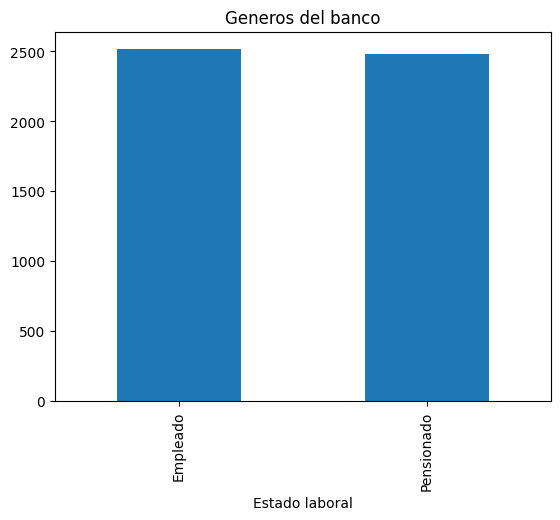

In [36]:
# Gráfico de barras de generos de cuentas de usuario
plot = df['Estado laboral'].value_counts().plot(kind='bar',
                                            title='Generos del banco')

Si quisiéramos enfocarnos en la *proporción relativa* de los generos de cada una de los tipos de cuenta, simplemente podemos sustituir a los recuentos con porcentajes y utilizar un *gráfico de barras de frecuencias relativas*.

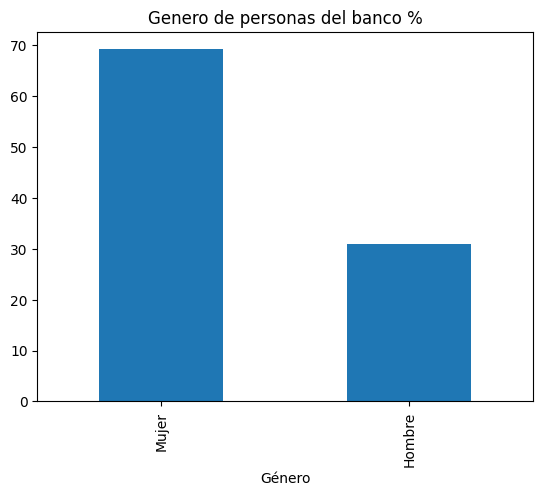

In [ ]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['Género'].value_counts() / len(df['Género'])).plot(
kind='bar', title='Genero de personas del banco %')

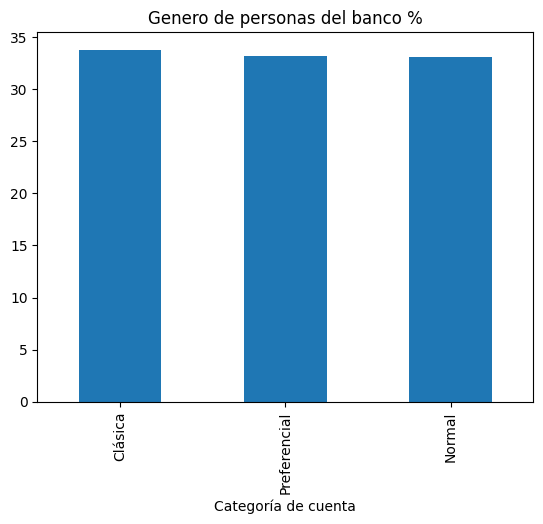

In [ ]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['Categoría de cuenta'].value_counts() / len(df['Categoría de cuenta'])).plot(
kind='bar', title='Genero de personas del banco %')

#### Gráfico de tortas

El [gráfico de torta](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular) muestra el total de casos como un círculo y luego corta este círculo en piezas cuyos tamaños son proporcionales a la fracción que cada categoría representa sobre el total de casos. Los [gráfico de tarta](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular) dan una impresión rápida de cómo todo un grupo se divide en grupos más pequeños. Lo podríamos graficar del siguiente modo, también utilizando el método `plot`:

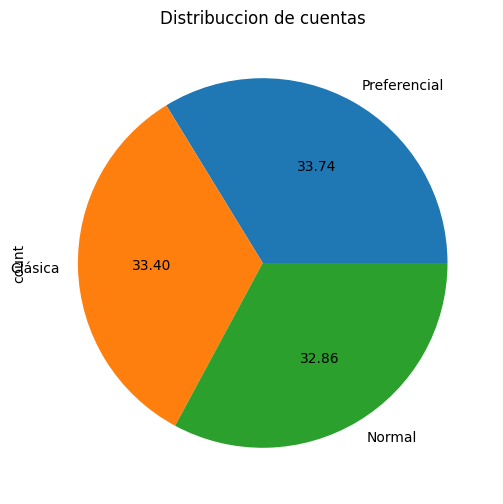

In [37]:
# Gráfico de torta tipos de cuentas
plot = df['Categoría de cuenta'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Distribuccion de cuentas')

### Relacionando variables categóricas

Al analizar las cuentas de los bancos, una de las preguntas que podríamos hacer es ¿existe alguna relación entre la clase de cuentas y la posibilidad de que tenga hijos? Para poder responder a esta pregunta, vamos a necesitar analizar a las variables *Categorìa de la cuenta* y *Tiene hijos* de nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) en forma conjunta. Una buena forma de analizar dos [variables categóricas](https://en.wikipedia.org/wiki/Categorical_variable) en forma conjunta, es agrupar los recuentos en una tabla de *doble entrada*; este tipo de tablas se conocen en [estadística](http://relopezbriega.github.io/tag/estadistica.html) con el nombre de [tabla de contingencia](https://es.wikipedia.org/wiki/Tabla_de_contingencia). Veamos como podemos crear esta tabla utilizando la función `crosstab` de [Pandas](http://pandas.pydata.org/).

In [38]:


# Análisis de relación entre hijos y ocupación

# Relación entre tener hijos y la ocupación
pd.crosstab(df['Estado laboral'], df['Categoría de cuenta'])




Categoría de cuenta,Clásica,Normal,Preferencial
Estado laboral,,,
Empleado,836,848,831
Pensionado,834,795,856


In [39]:
# Tabla de contingencia hijos  / categoria cuenta
pd.crosstab(index=df['Estado laboral'],
            columns=df['Categoría de cuenta'], margins=True)

Categoría de cuenta,Clásica,Normal,Preferencial,All
Estado laboral,,,,
Empleado,836,848,831,2515
Pensionado,834,795,856,2485
All,1670,1643,1687,5000


Los márgenes de la tabla, tanto en la derecha y en la parte inferior, nos muestran los totales. La línea inferior de la tabla representa la distribución de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) de la categoria de las cuentas. La columna derecha de la tabla es la distribución de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) de la variable de los hijos.
Cuando se presenta la información de este modo, cada celda de cada uno de los márgenes de la tabla representa la *distribución marginal* de esa variable en particular. Cada celda nos va a mostrar el recuento para la combinación de los valores de nuestras dos [variables categóricas](https://en.wikipedia.org/wiki/Categorical_variable), en este caso *categorìa de cuen ta* y *si tiene hijos*.

Al igual de como habíamos visto con las *tablas de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)*, también nos podría ser útil representar a las [tablas de contingencia](https://es.wikipedia.org/wiki/Tabla_de_contingencia) con porcentajes relativos; esto lo podríamos realizar utilizando el método `apply` del siguiente modo:

In [40]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Estado laboral'], columns=df['Categoría de cuenta'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Categoría de cuenta,Clásica,Normal,Preferencial,All
Estado laboral,,,,
Empleado,16.72,16.96,16.62,50.3
Pensionado,16.68,15.90,17.12,49.7
All,33.40,32.86,33.74,100.0


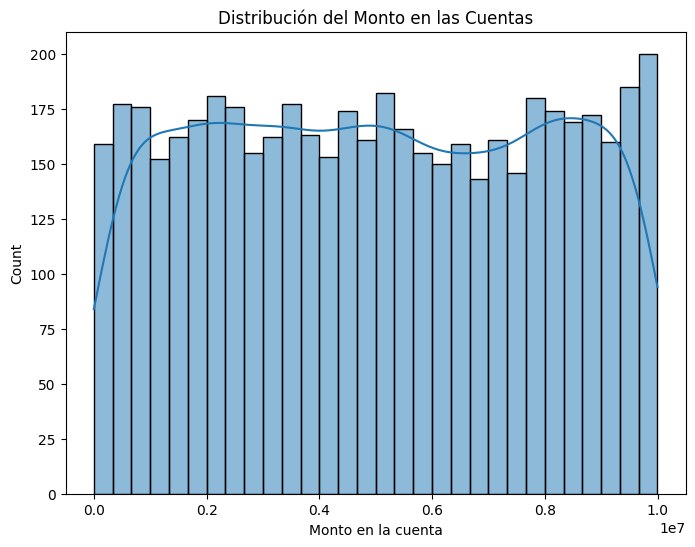

In [47]:
# Crear gráficos de distribución de montos
import matplotlib.pyplot as plt
import seaborn as sns
# Distribución de los montos en las cuentas
plt.figure(figsize=(8,6))
sns.histplot(df['Monto en la cuenta'], kde=True, bins=30)
plt.title('Distribución del Monto en las Cuentas')
plt.show()


